In [1]:
import cv2

In [2]:
img  = cv2.imread('./data/sudoku.jpg')
img

array([[[ 24,  63, 107],
        [ 20,  59, 103],
        [ 19,  61, 103],
        ...,
        [147, 149, 143],
        [144, 145, 143],
        [143, 144, 142]],

       [[ 29,  67, 109],
        [ 30,  68, 110],
        [ 27,  68, 107],
        ...,
        [147, 150, 148],
        [149, 150, 146],
        [147, 148, 144]],

       [[ 32,  68, 108],
        [ 34,  73, 112],
        [ 33,  72, 110],
        ...,
        [154, 156, 157],
        [152, 152, 152],
        [150, 150, 150]],

       ...,

       [[167, 167, 183],
        [165, 165, 181],
        [161, 164, 179],
        ...,
        [154, 160, 171],
        [160, 169, 183],
        [166, 175, 189]],

       [[170, 170, 186],
        [170, 170, 186],
        [160, 163, 177],
        ...,
        [159, 165, 178],
        [153, 162, 176],
        [160, 169, 183]],

       [[172, 172, 188],
        [175, 176, 190],
        [168, 171, 185],
        ...,
        [161, 166, 181],
        [153, 162, 176],
        [155, 164, 178]]

In [3]:
img.shape            #opencv read in BGR format but matplotlib reads in RGB format

(1024, 962, 3)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

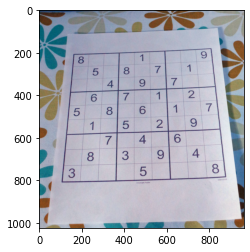

In [5]:
plt.imshow(img)

In [6]:
img = cv2.resize(img, (1500, 880))
original = img.copy()
img.shape

(880, 1500, 3)

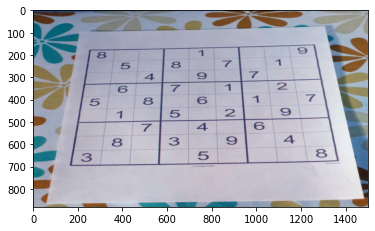

In [7]:
plt.imshow(img)

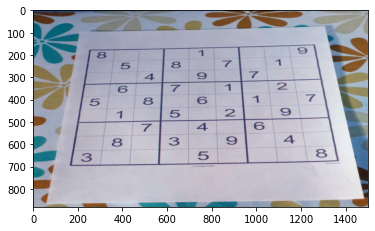

In [8]:
plt.imshow(original)

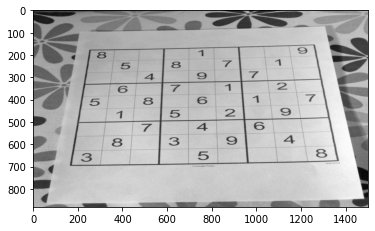

In [9]:
#image converted into grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = 'gray')

In [10]:
gray_img.shape

(880, 1500)

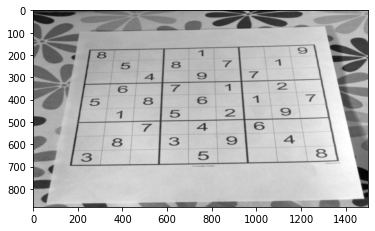

In [11]:
gray_img = cv2.GaussianBlur(gray_img, (5,5), 0)
plt.imshow(gray_img, cmap = 'gray')

STEP 1: Edge Detection


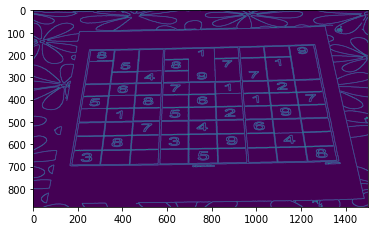

In [12]:
edged = cv2.Canny(gray_img, 0, 84)
print("STEP 1: Edge Detection")
plt.imshow(edged)
plt.show()

In [13]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(cnts[1])

[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  ...
  [308 306  -1  -1]
  [309 307  -1  -1]
  [ -1 308  -1  -1]]]


In [33]:
print(cnts[1][0].shape)

(152, 4)


In [44]:
(cnts, hierarchy) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [45]:
print(len(cnts))

32


In [46]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

In [47]:
print(len(cnts[0]))

510


In [49]:
for c in cnts:
    print(c)
    peri = cv2.arcLength(c, True)
    print(peri)

[[[1230  154]]

 [[1229  155]]

 [[1201  155]]

 ...

 [[1262  158]]

 [[1262  155]]

 [[1261  154]]]
3356.281306385994
[[[ 977   25]]

 [[ 976   26]]

 [[ 975   26]]

 [[ 976   27]]

 [[ 975   28]]

 [[ 976   28]]

 [[ 977   29]]

 [[ 978   29]]

 [[ 979   30]]

 [[ 980   30]]

 [[ 981   31]]

 [[ 982   31]]

 [[ 983   32]]

 [[ 984   32]]

 [[ 985   33]]

 [[ 986   33]]

 [[ 987   34]]

 [[ 988   34]]

 [[ 989   35]]

 [[ 990   35]]

 [[ 992   37]]

 [[ 993   37]]

 [[ 994   38]]

 [[ 995   38]]

 [[ 996   39]]

 [[ 997   39]]

 [[ 998   40]]

 [[ 999   40]]

 [[1000   41]]

 [[1001   41]]

 [[1002   42]]

 [[1003   42]]

 [[1004   43]]

 [[1006   43]]

 [[1007   44]]

 [[1008   44]]

 [[1009   45]]

 [[1010   45]]

 [[1011   46]]

 [[1012   46]]

 [[1013   47]]

 [[1014   47]]

 [[1015   48]]

 [[1017   48]]

 [[1019   50]]

 [[1021   50]]

 [[1022   51]]

 [[1023   51]]

 [[1024   52]]

 [[1026   52]]

 [[1027   53]]

 [[1028   53]]

 [[1029   54]]

 [[1030   54]]

 [[1031   55]]

